# Learning about Python

I've tried to learn Python and how it works for data about 100 times. This time i'm hoping that i can do it by actually writing the notebook vs. reading it from another source

Step 1, let's try to import the libraries that we need to actually build something

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

#this should allow plots to appear directly in the notebook
%matplotlib inline

# Example: Loading Advertising Data

Let's read the data from somewhere

In [3]:
#read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

What are the features in this database?

TV: Advertising dollars spent on TV for a single product (in thousands)
Radio: Advertising spend on Radio
Newspaper: advertising spent on Newspaper

What is the response?

Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
#print the shape of the data frame
data.shape

(200, 4)

200 observations, so there are 200 markets in the dataset

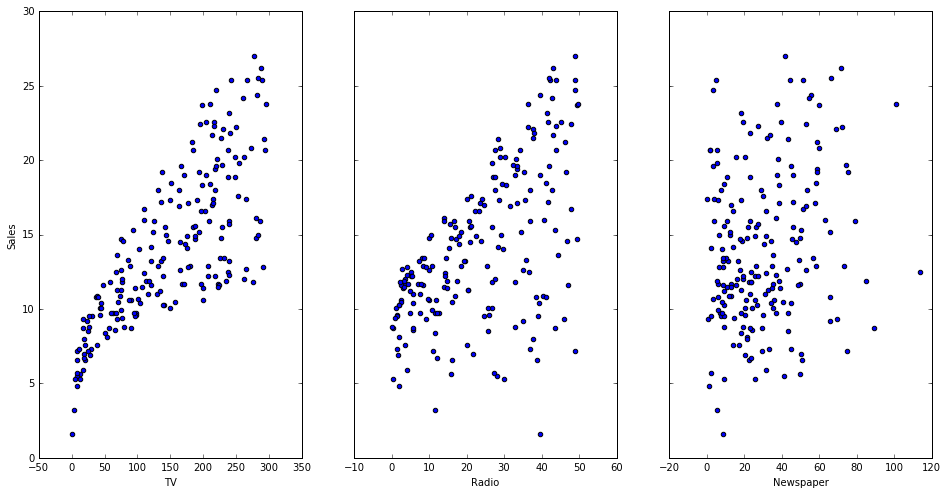

In [7]:
#visualize the relationship between the features and the response with scatterplots
fig, axs = plt.subplots(1,3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', figsize=(16,8), ax=axs[0])
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

So, if you ran this company, and someone asked you how to spend your advertising money in the future, what would you do? So you'd ask: "what is the general relation between ads and sales, and which ad types contribute to sales, and what relation has the biggest potential impact for each additional dollar to advertising?

Let's use statsmodel to build the regression model for each of the variables

In [8]:
# this is a standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted regression model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Ok. so that's cool. Basically for each thousand dollars I spend on TV, i'm going to get 47.53 widgets. so if we had $50k to spend, that would make us

In [9]:
7.032594 + 0.047537 * 50

9.409444

So we'd estimate selling 9,409 widgets in this new market with an investment of $50k in TV sales. 

Next, let's plot a line in the scatterplot so we can see what the likely result will be bewteen the min and max values of TV Sales

In [10]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

TV
0    0.7
1  296.4

Something interesting here is that we can use dot notation to refer to the subset of the data frame that had before. and then we're using the min/max functions to find those values. 

In [11]:
#make predictions for those new x values and store them
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

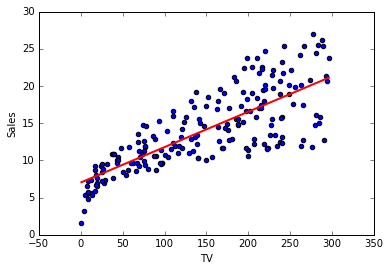

In [14]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

#then plot the LS line
plt.plot(X_new, preds, c='red', linewidth=2)

Ok. so le'ts look at the spread of values in the 95% confidence model

In [15]:
#use stats model functions to print the confidence intervals
lm.conf_int()

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

In [16]:
#and we can look at the p values as well
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [17]:
#also, the R squared data
lm.rsquared

0.61187505085007099

so, the fit is ok, but not perfect.

Let's try a model that has all the factors. 

In [18]:
# create a fitted regression model in one line
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

#print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [19]:
#we can get a summary of all this data
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           1.58e-96
Time:                        15:12:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, TV, Radio seem to have a positive effect. Radio has a very large effect, maybe because buy is cheaper but inventory is limited? unsure. Newspaper doesn't seem to matter at all, which makes sense since you know, newspapers.

So, now we're going to move over to scikit-learn, to do some cross validation, in part to figure out if a model with all variables predicts better than a model with only two variables. 

In [21]:
#Create X and Y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

#follow the scikit-learn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

#print the intercept and coeffs
print(lm.intercept_)
print(lm.coef_)

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]
